# 

# Exploring first and second derivatives with Julia

To get started, we load the `MTH229` package:

In [1]:
using MTH229
using Plots
plotly()

Recall, when `MTH229` is loaded, the same prime notation of mathematics
is available in `Julia` for indicating derivatives of functions (through
`ForwardDiff`).

## Quick background

Read about this material here: [Exploring first and second derivatives
with Julia](http://mth229.github.io/first-second-derivatives.html).

This assignment looks at the relationship between a function, $f(x)$,
and its first and second derivatives: $f'(x)$ and $f''(x)$. The basic
relationship can be summarized (though the devil is in the details) by:

-   If the first derivative is *positive* on $(a,b)$ then the function
    is *increasing* on $(a,b)$.

-   If the second derivative is *positive* on $(a,b)$ then the function
    is *concave up* on $(a,b)$.

(The “devil” here is that the converse statements are usually - but not
always - true.)

Some key definitions are:

-   A **critical** point of $f$ is a value in the domain of $f(x)$ for
    which the derivative is $0$ or undefined. These are often—but **not
    always**—where $f(x)$ has a local maximum or minimum.

-   An **inflection point** of $f$ is a value in the domain of $f(x)$
    where the concavity of $f$ *changes*. (These are *often*—but **not
    always**—where $f''(x)=0$.)

These two relationships and definitions are put to use to characterize
*local extrema* of a function via one of two “derivative” tests:

-   The **first derivative test**: This states that if $c$ is a critical
    point of $f(x)$ then if $f'(x)$ changes sign from $+$ to $-$ at $c$
    then $f(c)$ is a local maximum and if $f'(x)$ changes sign from $-$
    to $+$ then $f(c)$ is a local minimum. If there is no sign change,
    then $f(c)$ is neither a local minimum or maximum.

-   The **second derivative test**: This states that if $c$ is a
    critical point of $f(x)$ and $f''(c) > 0$ then $f(c)$ is a local
    minimum and if $f''(c) < 0$ then $f(c)$ is a local maximum. The test
    says nothing about the case $f''(c) = 0$.

------------------------------------------------------------------------

We investigate these concepts in `Julia` both graphically and
numerically.

For the graphical exploration, the `plotif` function from the `MTH229`
package is quite useful.

It is used to plot a function `f` using two colors; the color choice
depending on whether the second function, `g` is non-negative or not.

This function can be used to graphically illustrate where the graph of
`f` is *positive*, *increasing*, or *concave up*: `plotif(f, f, a, b)`
will show a different color when $f(x)$ is *positive*,
`plotif(f, f', a, b)` will show a different color when $f(x)$ is
*increasing*, and `plotif(f, f'', a, b)` will show a different color
when $f(x)$ is *concave up*. For example, here we see where the
following `f` is increasing:


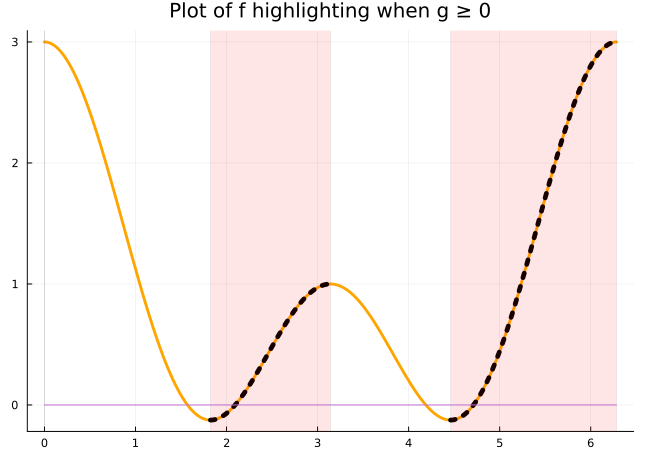

In [3]:
f(x) = 1 + cos(x) + cos(2x)
plotif(f, f', 0, 2pi)  # color increasing
plot!(zero)

### `fzeros`

Once eyes are trained to identify zeros, critical points, or inflection
points of a function, we can use numeric methods to zoom in on more
accurate values.

Recall, `fzero(f, a, b)` will find a zero of `f` **if** `[a,b]` is a
*bracketing* interval (`f` takes different signs at the endpoints); and
`fzero(f, c)` will try to find a zero *near* `c`.

These two methods are incorporated into the convenience function
`fzeros(f, a, b)` which *attempts* to identify all zeros within
`[a, b]`.

It is called like `plot` with a function and two values indicating the
interval to scan:

In [4]:
zs = fzeros(f, 0, 2pi)

4-element Vector{Float64}:
 1.5707963267948966
 2.0943951023931953
 4.1887902047863905
 4.71238898038469

The `fzeros` function returns a container of values, which may, of
course, be empty. Above we assigned the name `zs` to these values.

There are times when applying a function to the returned values is
desired. The “dot” makes this easy. Here we apply `f` to the values in
`zs` and expect to see values near `0`:

In [5]:
f.(zs)

4-element Vector{Float64}:
  0.0
 -2.220446049250313e-16
  3.3306690738754696e-16
 -2.220446049250313e-16

------------------------------------------------------------------------

If our task was to get *all* critical points of `f` in the interval
$(0, 2\pi)$, then `fzeros` is an easy-to-use choice: As `f` is
continuously differentiable, all critical points are given by solving
$f'(x)=0$:

In [6]:
fzeros(f', 0, 2pi)

5-element Vector{Float64}:
 0.0
 1.8234765819369751
 3.141592653589793
 4.459708725242611
 6.283185307179586

### `sign_chart`

These same values are also identified by `sign_chart` (which uses
`fzeros` behind the scenes) and indicates whether the function changes
sign at the identified zeros (or undefined values):

In [7]:
sign_chart(f', 0, 2pi)

5-element Vector{NamedTuple{(:zero_oo_NaN, :sign_change)}}:
 (zero_oo_NaN = 0.0, sign_change = an endpoint)
 (zero_oo_NaN = 1.82347658194, sign_change = - to + )
 (zero_oo_NaN = 3.14159265359, sign_change = + to - )
 (zero_oo_NaN = 4.45970872524, sign_change = - to + )
 (zero_oo_NaN = 6.28318530718, sign_change = an endpoint)

This output shows, for example, that $f'(x)$ is positive on
$(1.82\dots, 3.14\dots)$ and again on $(4.45\dots, 6.28\dots)$. This
could be used to conclude where $f(x)$ is *increasing*.

------------------------------------------------------------------------

If our task is to get all *inflection* points of `f` in the interval,
then the `sign_chart` function is helpful, as inflection points are
points in the domain where the concavity changes:

In [8]:
sign_chart(f'', 0, 2pi)

4-element Vector{NamedTuple{(:zero_oo_NaN, :sign_change)}}:
 (zero_oo_NaN = 0.866676087105, sign_change = - to + )
 (zero_oo_NaN = 2.45335016275, sign_change = + to - )
 (zero_oo_NaN = 3.82983514443, sign_change = - to + )
 (zero_oo_NaN = 5.41650922007, sign_change = + to - )

As the sign changes at each of the identified values, all `4` are
inflection points.

### Careful

The convenient `fzeros` and `sign_chart` functions are only *pretty*
good at finding all the zeros over the interval. For some functions –
especially those cooked up by clever math professors – the choice of
interval can lead to `fzeros` finding fewer than is mathematically
possible. The functions should be used in combination with a plot and
with as narrow an interval specified, as reasonable.

------------------------------------------------------------------------

In [9]:
# Your commands go here